# TP1 - Pandas y Visualización de datos

V4. Reproduzca exactamente esta visualización

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
peliculas_original = pd.read_csv("/content/drive/MyDrive/Organización de Datos/TP1/Movie dataset/movies.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
pelis = peliculas_original[ ["title", "genres"] ].fillna("")
pelis["genres"] = pelis["genres"].map(lambda x : x.split(","))
pelis_expandida = pelis.explode("genres")

generos = pelis_expandida["genres"].unique().tolist()
generos.remove("History")
generos.remove("War")
generos.remove("Foreign")
generos.remove("Western")
generos.remove("TV Movie")
generos = ["Crime", "Mystery", "Thriller", "Horror", "Fantasy", "Family", "Animation", "Science Fiction", "Action", "Adventure", "Documentary", "Music", "Comedy", "Drama", "Romance"]
generos_español = ["Crimen", "Misterio", "Suspenso", "Horror", "Fantasía", "Familiar", "Animación", "Ciencia Ficción", "Acción", "Aventura", "Documental", "Musical", "Comedia", "Drama", "Romance"]

for genero in generos:
  pelis[genero] = pelis["genres"].apply(lambda x : x.count(genero))

pelis.rename(columns=dict(zip(generos, generos_español)), inplace=True)

corr_generos = pelis.corr()
corr_generos[corr_generos.select_dtypes(include=['number']).columns] *= 100
corr_generos = corr_generos.round().astype(int)

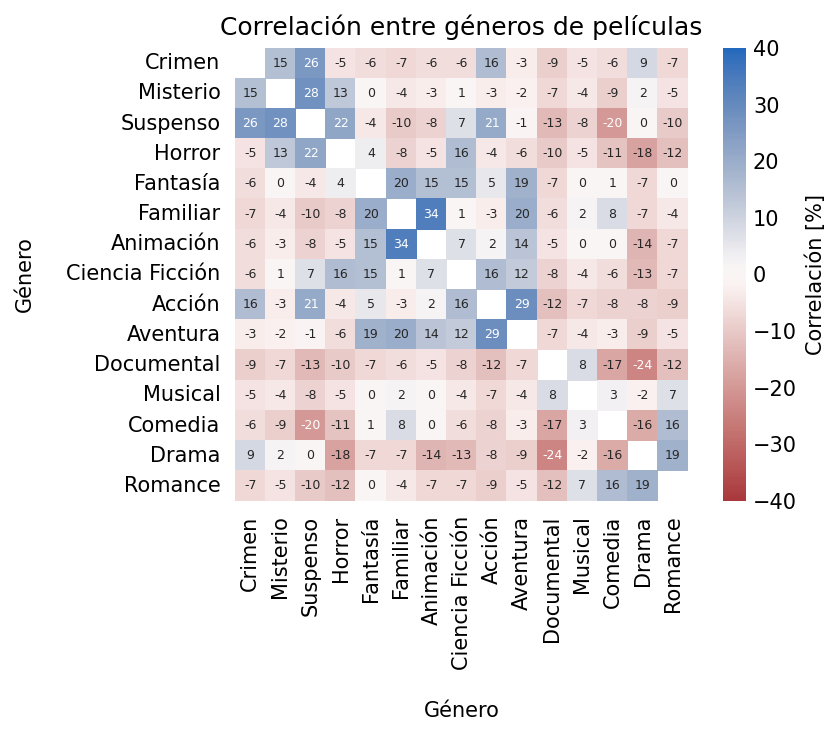

In [8]:
plt.figure(dpi=150)
grafico = sns.heatmap(corr_generos, vmin=-40, vmax=40, annot=True, square=True, mask=(corr_generos==100), annot_kws={"size":6}, cbar_kws={ "label" : "Correlación [%]"}, cmap=sns.color_palette("vlag_r", as_cmap=True))
plt.title("Correlación entre géneros de películas")
plt.xlabel("Género", labelpad=15)
plt.ylabel("Género", labelpad=15)
grafico.tick_params(left=False, bottom=False)
cbar = grafico.collections[0].colorbar
cbar.ax.tick_params(size=0)